In [ ]:
# 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
import os
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

# 🔽 Download NLTK Resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# Setup stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Text Cleaning Function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Merge headlines, description, content
def merge_text_columns(df):
    df.columns = df.columns.str.lower()
    headlines = df.get('headlines', '')
    description = df.get('description', '')
    content = df.get('content', '')
    return headlines.astype(str) + ' ' + description.astype(str) + ' ' + content.astype(str)


In [ ]:
#Reading the csv files using read_csv() from Pandas
df_business      = pd.read_csv('/content/business_data.csv')
df_education     = pd.read_csv('/content/education_data.csv')
df_entertainment = pd.read_csv('/content/entertainment_data.csv')
df_sports        = pd.read_csv('/content/sports_data.csv')
df_technology    = pd.read_csv('/content/technology_data.csv')

1. Basic information about the dataset


In [ ]:
df_business.head()

,headlines,description,content,url,category
0,Nirmala Sitharaman to equal Morarji Desai’s re...,With the presentation of the interim budget on...,"Sitharaman, the first full-time woman finance ...",https://indianexpress.com/article/business/bud...,business
1,"‘Will densify network, want to be at least no....","'In terms of market share, we aim to double it...",The merger of Tata group’s budget airlines Air...,https://indianexpress.com/article/business/avi...,business
2,Air India group to induct an aircraft every si...,Air India currently has 117 operational aircra...,The Air India group plans to induct one aircra...,https://indianexpress.com/article/business/avi...,business
3,Red Sea woes: Exporters seek increased credit ...,Rising attacks forced shippers to consider the...,Indian exporters have asked the central govern...,https://indianexpress.com/article/business/red...,business
4,Air India group to induct a plane every 6 days...,"Apart from fleet expansion, 2024 will also see...",The Air India group plans to induct one aircra...,https://indianexpress.com/article/business/avi...,business


In [ ]:
df_education.head()


,headlines,description,content,url,category
0,CUET PG 2024: Register with NTA to enable admi...,CUET PG 2024: UGC said that the list of partic...,The Common University Entrance Test Postgradua...,https://indianexpress.com/article/education/cu...,education
1,Oxford ends ties with TCS iON over technical g...,"On April 10, 2023 TCS had announced that it ha...",Less than a year after the Oxford University s...,https://indianexpress.com/article/education/ox...,education
2,"Enrollments in Computer Engineering surge, mec...",AISHE Report 2021-22: The enrollment in STEM (...,Student enrollments in Computer Engineering ha...,https://indianexpress.com/article/education/en...,education
3,"NDMC plans to provide free JEE, NEET UG coachi...",The coaching partner will also provide up-to-d...,The New Delhi Municipal Council (NDMC) is invi...,https://indianexpress.com/article/education/nd...,education
4,"BA courses register highest enrollment, maximu...",AISHE Report 2021-22: For programmes including...,Bachelor of Arts (BA) courses had the highest ...,https://indianexpress.com/article/education/ba...,education


In [ ]:
df_entertainment.head()

,headlines,description,content,url,category
0,Bhumi Pednekar plays an investigative journali...,Bhumi Pednekar plays an investigative journali...,Actor Bhumi Pednekar is all set to take over t...,https://indianexpress.com/article/entertainmen...,entertainment
1,Karan Johar channels his inner Rajinikanth in ...,Karan Johar and Kiara Advani featured in a new...,Karan Johar reunited with his Lust Stories sta...,https://indianexpress.com/article/entertainmen...,entertainment
2,"‘Shah Rukh Khan is irreplaceable, actors will ...",Karan Johar opened up about the blurring lines...,Filmmaker Karan Johar declared the the concept...,https://indianexpress.com/article/entertainmen...,entertainment
3,"Years after break-up with Divya Agarwal, Varun...",Varun Sood said that it is easy for him to for...,Ever since Divya Agarwal and Varun Sood parted...,https://indianexpress.com/article/entertainmen...,entertainment
4,Guntur Kaaram box office collection Day 6: Mah...,Guntur Kaaram box office collection Day 6: Mah...,"On Tuesday (Day 5), Mahesh Babu’s latest relea...",https://indianexpress.com/article/entertainmen...,entertainment


In [ ]:
df_sports.head()

,headlines,description,content,url,category
0,Jannik Sinner’s strong and improved baseline g...,Baseline strategy has been central to Jannik S...,"In a resolute, nerveless, three-hour-long disp...",https://indianexpress.com/article/sports/tenni...,sports
1,Allan Border opens up about Parkinson’s diseas...,Former Australia captain says the disease has ...,Legendary Australia cricketer Allan Border has...,https://indianexpress.com/article/sports/crick...,sports
2,Australian Open 2024: Jannik Sinner stops Nova...,"Sinner defeated Djokovic 6-1, 6-2, 6-7, 6-3 in...",Jannik Sinner has stunned Novak Djokovic to re...,https://indianexpress.com/article/sports/tenni...,sports
3,‘It looked like a dead lbw’: Ben Duckett on Sh...,Duckett believes England are still in the game...,England opener Ben Duckett says Shubman Gill s...,https://indianexpress.com/article/sports/crick...,sports
4,"In crunch time, Kiran George produces an aggre...",As Kiran George had missed out on opportunitie...,"Since the start of 2023, Kiran George had play...",https://indianexpress.com/article/sports/badmi...,sports


In [ ]:
df_technology.head()

,headlines,description,content,url,category
0,Unlocking the science of E Ink displays: Why w...,That e-reader screen isn't magic - it's E Ink!...,"With their crisp, paper-like screens, e-reader...",https://indianexpress.com/article/technology/t...,technology
1,Reddit is free education: 9 subreddits that ca...,These subreddits bring the best of the Interne...,"Education is the key to success, it not only l...",https://indianexpress.com/article/technology/f...,technology
2,Nintendo Switching things up? Leaks suggest la...,Rumour has it the upcoming Nintendo Switch 2 w...,Rumours are heating up that Nintendo may unvei...,https://indianexpress.com/article/technology/g...,technology
3,Epic’s Fortnite and new browser engines show c...,The EU's antitrust regulations are forcing App...,Apple is continuing to open up iOS to comply w...,https://indianexpress.com/article/technology/t...,technology
4,Hubble finds water vapour on small exoplanet i...,Scientists have used the Hubble Space Telescop...,Astronomers used the Hubble Space Telescope to...,https://indianexpress.com/article/technology/s...,technology


In [ ]:

# Concatenate all datasets
df = pd.concat([df_business, df_education, df_entertainment, df_sports, df_technology], ignore_index=True)

# Check combined dataset
print(df.head())


                                           headlines  \
0  Nirmala Sitharaman to equal Morarji Desai’s re...   
1  ‘Will densify network, want to be at least no....   
2  Air India group to induct an aircraft every si...   
3  Red Sea woes: Exporters seek increased credit ...   
4  Air India group to induct a plane every 6 days...   

                                         description  \
0  With the presentation of the interim budget on...   
1  'In terms of market share, we aim to double it...   
2  Air India currently has 117 operational aircra...   
3  Rising attacks forced shippers to consider the...   
4  Apart from fleet expansion, 2024 will also see...   

                                             content  \
0  Sitharaman, the first full-time woman finance ...   
1  The merger of Tata group’s budget airlines Air...   
2  The Air India group plans to induct one aircra...   
3  Indian exporters have asked the central govern...   
4  The Air India group plans to induct one air

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    10000 non-null  object
 1   description  10000 non-null  object
 2   content      10000 non-null  object
 3   url          10000 non-null  object
 4   category     10000 non-null  object
dtypes: object(5)
memory usage: 390.8+ KB
None


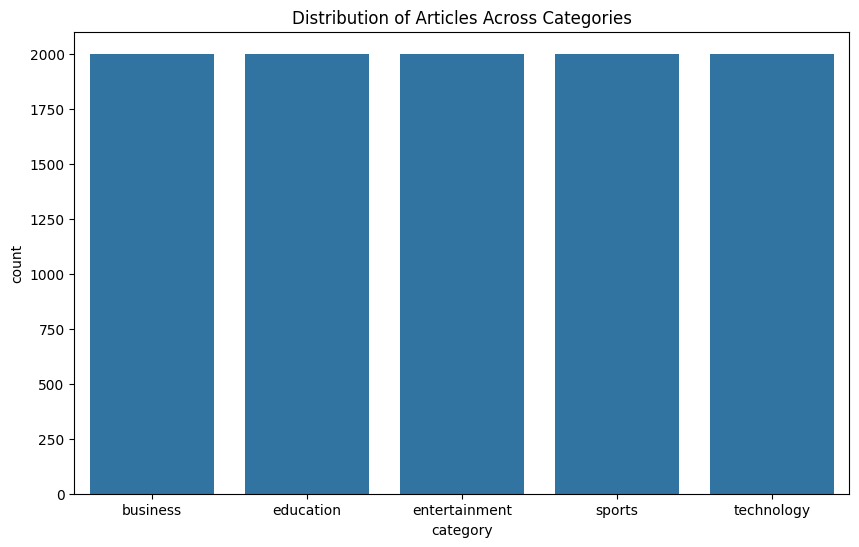

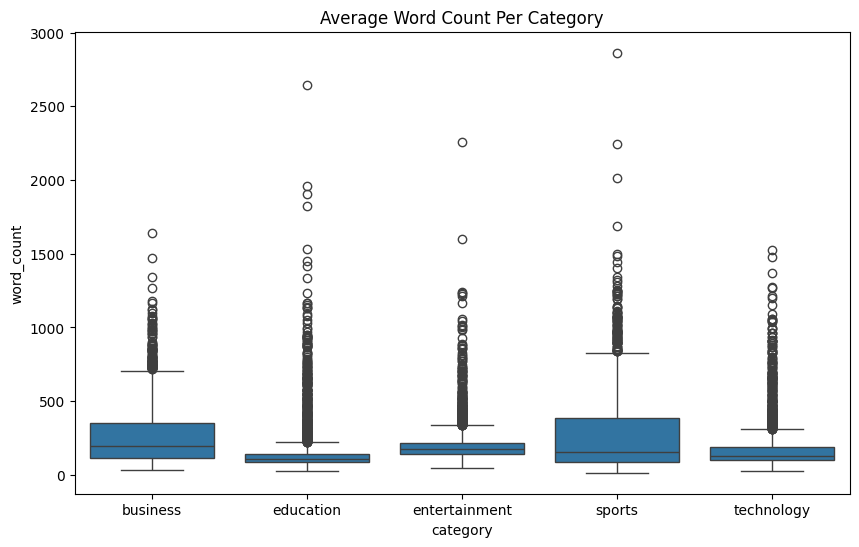

In [ ]:
print(df.info())

# Distribution of articles across categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='category')
plt.title('Distribution of Articles Across Categories')
plt.show()

# Average word count per category
df['word_count'] = df['content'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='word_count')
plt.title('Average Word Count Per Category')
plt.show()

2. Text Preprocessing

In [ ]:
print(df.columns)


Index(['headlines', 'description', 'content', 'url', 'category', 'word_count'], dtype='object')


In [ ]:
import string
import nltk
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

# Download NLTK resources (only need to run once)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize Lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation, numbers, and special characters
    text = ''.join([char for char in text if char not in string.punctuation and not char.isdigit()])
    # Tokenize text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing to all text fields (headline, description, content)
df['processed_text'] = df['headlines'] + ' ' + df['description'] + ' ' + df['content']
df['processed_text'] = df['processed_text'].apply(preprocess_text)

# Inspect preprocessed data
print(df['processed_text'].head())


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    nirmala sitharaman equal morarji desai ’ recor...
1    ‘ densify network want least city pair ’ air i...
2    air india group induct aircraft every six day ...
3    red sea woe exporter seek increased credit fre...
4    air india group induct plane every day through...
Name: processed_text, dtype: object


3. Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=1000)  # Unigrams and bigrams
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_text'])

# Alternatively, you can use CountVectorizer
count_vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=1000)
X_count = count_vectorizer.fit_transform(df['processed_text'])

# Check the shape of the features
print(f"TF-IDF Shape: {X_tfidf.shape}")
print(f"CountVectorizer Shape: {X_count.shape}")


TF-IDF Shape: (10000, 1000)
CountVectorizer Shape: (10000, 1000)


4. Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['category'])

# Optional: save the label encoder for later use
joblib.dump(label_encoder, "label_encoder.pkl")

# Train/test split
X = X_tfidf  # or X_count
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
}

# Train and evaluate models
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    print(f"{model_name} Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



Training Logistic Regression...
Logistic Regression Classification Report:
               precision    recall  f1-score   support

     business       0.96      0.97      0.96       410
    education       0.99      0.98      0.99       393
entertainment       0.99      0.97      0.98       395
       sports       0.97      0.99      0.98       415
   technology       0.95      0.95      0.95       387

     accuracy                           0.97      2000
    macro avg       0.97      0.97      0.97      2000
 weighted avg       0.97      0.97      0.97      2000

Logistic Regression Confusion Matrix:
[[396   0   0   1  13]
 [  2 387   0   2   2]
 [  0   2 383   6   4]
 [  2   0   1 411   1]
 [ 11   1   2   4 369]]

Training Naive Bayes...
Naive Bayes Classification Report:
               precision    recall  f1-score   support

     business       0.96      0.96      0.96       410
    education       1.00      0.98      0.99       393
entertainment       0.99      0.97      0.98  

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:29:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
               precision    recall  f1-score   support

     business       0.98      0.97      0.97       410
    education       0.99      0.98      0.98       393
entertainment       0.99      0.97      0.98       395
       sports       0.98      0.99      0.99       415
   technology       0.94      0.97      0.96       387

     accuracy                           0.98      2000
    macro avg       0.98      0.98      0.98      2000
 weighted avg       0.98      0.98      0.98      2000

XGBoost Confusion Matrix:
[[398   1   0   1  10]
 [  3 385   0   2   3]
 [  0   1 383   2   9]
 [  1   0   2 411   1]
 [  5   3   0   3 376]]


5. Model Evaluation

Accuracy: 0.9685
Precision: 0.968932758499763
Recall: 0.9685
F1-Score: 0.9685928380309701


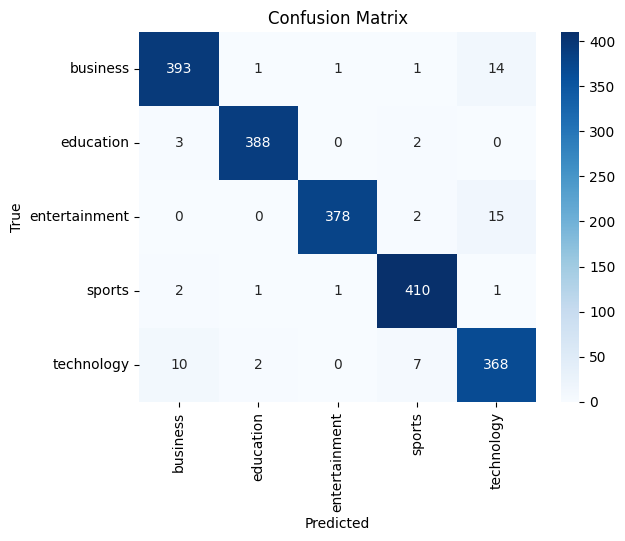

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Choose the best model (e.g., Random Forest)
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=df['category'].unique(), yticklabels=df['category'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")

# Use the best model
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)
print(f"Final Evaluation (Accuracy): {accuracy_score(y_test, y_pred_best)}")


Best Parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-Validation Score: 0.9641249999999999
Final Evaluation (Accuracy): 0.9665


Final Output and Inference

In [ ]:
import joblib

# Save the trained model using joblib
joblib.dump(best_rf_model, 'news_classifier_model.pkl')

# Load the model for inference
loaded_model = joblib.load('news_classifier_model.pkl')

# Example: Predict on new data (in real use case, provide a new article's text)
new_article = "Australian Open: Jannik Sinner can match Novak Djokovic in his game, but can he emulate the Serbâ€™s appetite for the big stage?."
new_article_processed = preprocess_text(new_article)
new_article_tfidf = tfidf_vectorizer.transform([new_article_processed])
prediction = loaded_model.predict(new_article_tfidf)

print(f"Predicted Category: {prediction[0]}")


Predicted Category: 3
